In [44]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter

import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

import sys, os

- Con el dataset proporcionado:
    - hacer una reducción de la dimensionalidad de forma que  se reduzcan las dimensiones al máximo pero conservando al menos el 95% de la varianza
    
    - Representar gŕaficamente las dos dimensiones principales
    
    - Realizar un clustering determinando el número de clusters óptimo (inercia, silueta..). Probar  con k-means, dbscan, mezclas gausianas y clustering aglomerativo

    - Con los clústeres finales analizar como se distribuye cada variable en ellos

    - Razonar de forma justificada todas las decisiones que se tomen y conclusiones que se obtengan

# Obtención de datos

In [45]:
wine_org = pd.read_csv("archives/wine-clustering.csv")
wine_org.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [46]:
wine_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


# Reducción de dimensionalidad

In [47]:
wine_scl = StandardScaler().fit_transform(wine_org)

In [48]:
cols = [f"x{i}" for i in range(wine_scl.shape[1])]
df = pd.DataFrame(wine_scl, columns= cols)

In [49]:
pca = PCA(n_components=0.95)
wine_pca = pca.fit_transform(wine_scl)

In [50]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019])

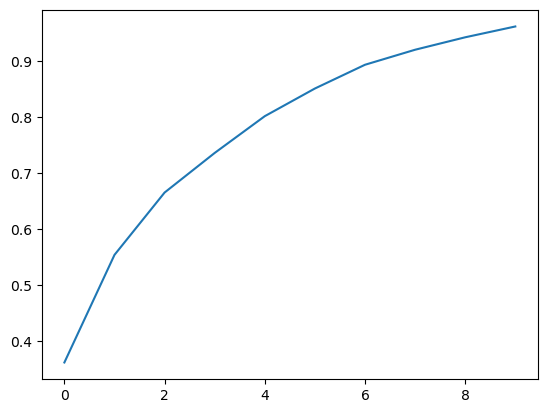

In [51]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)

# Representación gráfica de las dos dimensiones principales

178


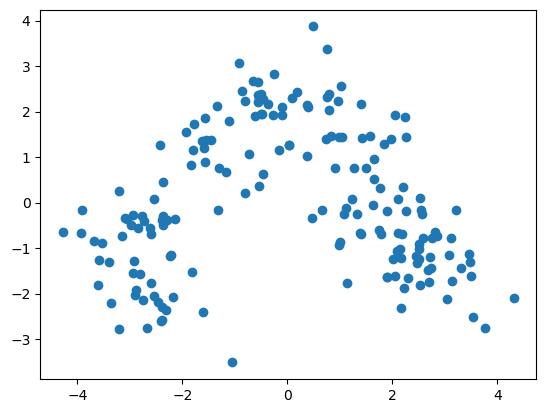

In [52]:
# usando las dos primeras columnas para visualizar
plt.scatter(wine_pca[:, 0], wine_pca[:, 1])
print(wine_pca.shape[0])

# Clustering

## Kmeans

In [53]:
X = wine_pca[:,:2]
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(X)
y_pred # cluster al que cada elemento fue asignado en la predicción

c:\Users\nicolas.portossaaved\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2,
       2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2,
       2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 3, 3, 1, 2, 1, 2,
       2, 1, 3, 2, 3, 2, 3, 2, 2, 1, 1, 3, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       3, 1, 3, 3, 3, 1, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 2,
       2, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 2, 3, 3, 1, 1, 1, 3, 1, 3, 3, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [54]:
kmeans.cluster_centers_ # centros

array([[-2.78731767, -1.30156583],
       [ 0.07264837,  2.15207284],
       [ 1.63828608,  0.27480859],
       [-1.49302632,  1.02615309],
       [ 2.67279778, -1.37309721]])

In [55]:
kmeans.labels_ # durante train, a que cluster fue asignado cada elemento

array([4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2,
       2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2,
       2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 3, 3, 1, 2, 1, 2,
       2, 1, 3, 2, 3, 2, 3, 2, 2, 1, 1, 3, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       3, 1, 3, 3, 3, 1, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 2,
       2, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 2, 3, 3, 1, 1, 1, 3, 1, 3, 3, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [56]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=8)

def plot_centroids(centroids,  circle_color='w', cross_color='k'):
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=2, linewidths=12, color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, anomalies=None):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    resolution=1000
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),   np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),  cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),  linewidths=1, colors='k')
    plot_data(X)
    if anomalies is None: anomalies = clusterer.cluster_centers_
    plot_centroids(anomalies)

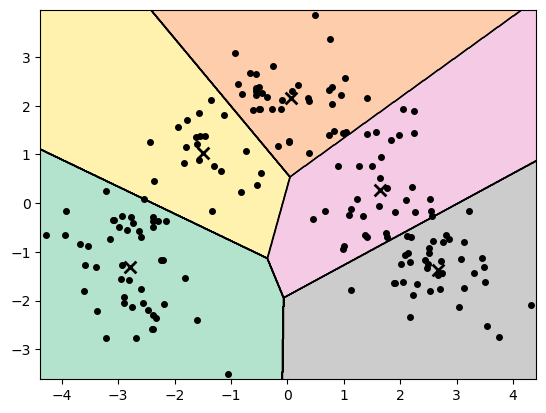

In [57]:
plot_decision_boundaries(kmeans, X)

In [58]:
print(kmeans.predict(X)) # esto nos da a que cluster fueron asignados
kmeans.transform(X) # esto nos da la distancia de las nuevas instancias a cada centro

[4 2 4 4 2 4 4 4 4 4 4 2 4 4 4 4 4 4 4 4 4 2 2 2 2 2 2 2 4 2 4 4 2 4 2 2 2
 2 2 4 4 2 4 2 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 3 3 1 2 1 2 2 1 3 2 3 2 3 2
 2 1 1 3 2 1 1 1 1 3 1 1 1 1 3 1 3 3 3 1 1 2 3 1 2 1 1 1 1 1 1 3 1 3 1 2 2
 1 3 1 1 1 1 1 3 1 1 2 3 3 1 1 1 3 1 3 3 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


array([[6.10571754, 4.84273436, 2.40201995, 5.40675114, 0.64778608],
       [5.25746386, 2.80599034, 0.5741754 , 3.7667437 , 1.76827198],
       [5.31094656, 4.01329049, 1.57391638, 4.50674256, 0.37587364],
       [6.70413404, 6.13740665, 3.69828094, 6.47077744, 1.75757948],
       [3.82069735, 3.16361894, 1.30626013, 3.13917709, 1.73833386],
       [5.89499895, 5.20934377, 2.78213363, 5.52763864, 0.83900506],
       [5.23794031, 4.08850703, 1.66099755, 4.51494116, 0.29891006],
       [4.85649283, 4.25355377, 1.93027554, 4.42310207, 0.65714862],
       [5.31205294, 3.92055209, 1.47796205, 4.45098049, 0.48297837],
       [5.56456254, 3.97996695, 1.54162516, 4.6184894 , 0.58923001],
       [6.2670544 , 4.85192458, 2.42452401, 5.49092164, 0.81003576],
       [4.59411988, 3.23565271, 0.89440126, 3.6375185 , 1.19252255],
       [4.94058142, 3.48729936, 1.06267168, 3.98786735, 0.89398555],
       [6.24781327, 4.71569768, 2.29938835, 5.40054879, 0.82193627],
       [7.14440545, 6.00205505, 3.

In [59]:
print(kmeans.inertia_)
print(kmeans.score(X))

155.18979285554752
-155.1897928555475


c:\Users\nicolas.portossaaved\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nicolas.portossaaved\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nicolas.portossaaved\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nicolas.porto

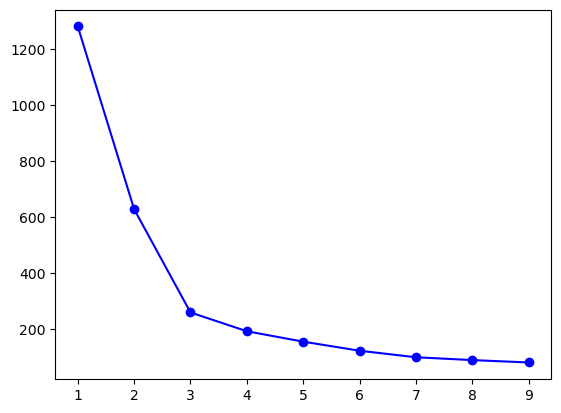

In [60]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42, n_init=10).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.plot(range(1, 10), inertias, "bo-")

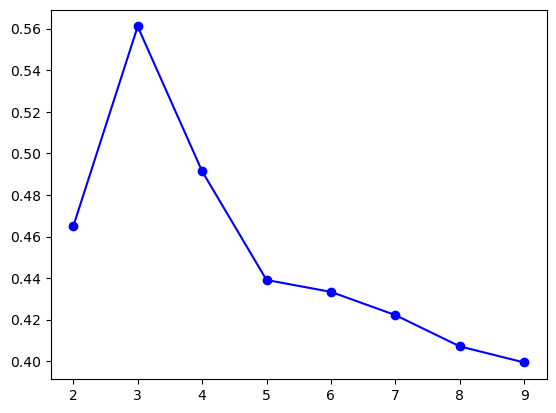

In [61]:
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]
plt.plot(range(2, 10), silhouette_scores, "bo-")

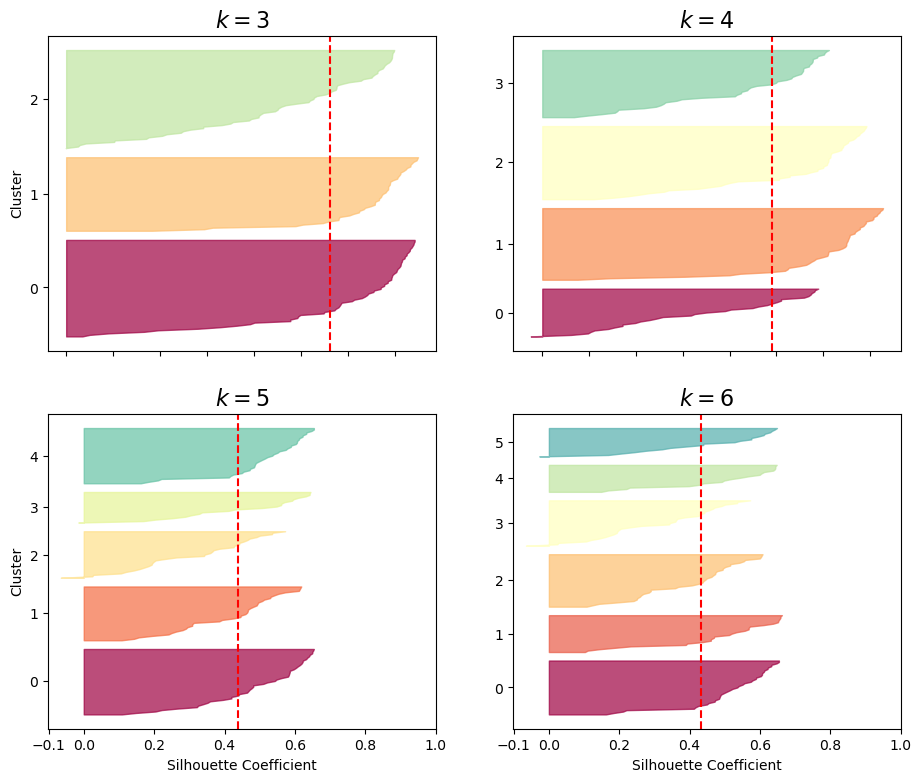

In [62]:
plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

## Analisis

Basándonos en la figura anterior podemos determinar que el numero óptimo es 3

In [63]:
# X = wine_pca[:,:2]
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(X)
y_pred # cluster al que cada elemento fue asignado en la predicción

c:\Users\nicolas.portossaaved\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

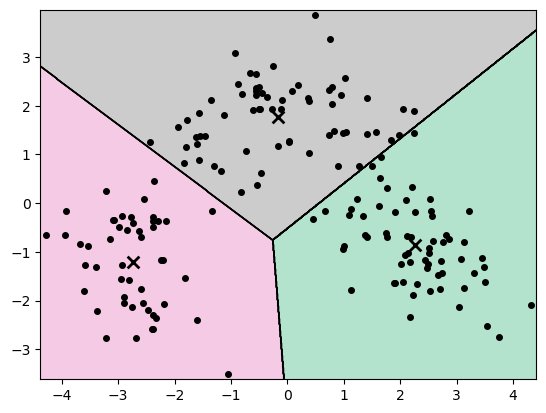

In [64]:
plot_decision_boundaries(kmeans, X)

## DbScans

In [65]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.55, min_samples=5)
dbscan.fit(X)
dbscan.labels_[:10]

array([ 0,  0,  0, -1,  0,  0,  0,  0,  0,  0], dtype=int64)

In [66]:
len(dbscan.core_sample_indices_)

133

In [67]:
dbscan.core_sample_indices_[:10]

array([ 0,  1,  2,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [68]:
dbscan.components_[:3]

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ]])

In [69]:
def plot_dbscan(dbscan, X, size):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    # non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    # non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)

In [70]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2], dtype=int64)

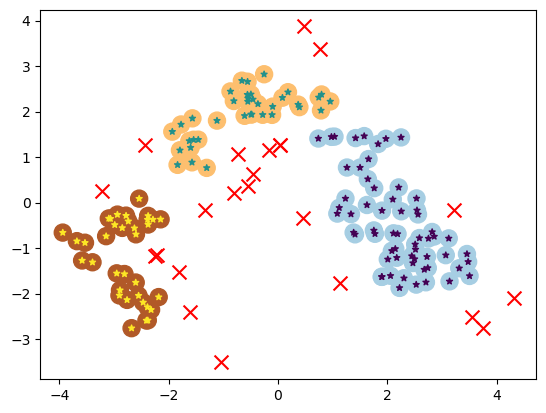

In [71]:
plot_dbscan(dbscan, X, size=150)

## Gausiana

In [72]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10, covariance_type="full")
gm.fit(X)

c:\Users\nicolas.portossaaved\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nicolas.portossaaved\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nicolas.portossaaved\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nicolas.porto

GaussianMixture(n_components=3, n_init=10)

In [73]:
gm.n_iter_

3

In [74]:
gm.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [75]:
gm.predict_proba(X)

array([[1.49363924e-07, 9.99999851e-01, 2.86925966e-23],
       [2.53523230e-02, 9.74647677e-01, 2.77926083e-18],
       [9.00385458e-06, 9.99990996e-01, 1.59369453e-18],
       [8.08228835e-12, 1.00000000e+00, 2.21575956e-24],
       [2.48488300e-03, 9.97515115e-01, 2.17520277e-09],
       [3.88568760e-09, 9.99999996e-01, 1.99705699e-20],
       [4.81984181e-06, 9.99995180e-01, 7.04983991e-18],
       [1.76813799e-06, 9.99998232e-01, 1.16433910e-14],
       [1.71080633e-05, 9.99982892e-01, 1.20977619e-18],
       [2.26368708e-05, 9.99977363e-01, 2.20400160e-20],
       [2.99333275e-07, 9.99999701e-01, 1.45068037e-24],
       [5.26925792e-04, 9.99473074e-01, 2.54911990e-14],
       [1.52885680e-04, 9.99847114e-01, 1.87183958e-16],
       [9.86715198e-07, 9.99999013e-01, 1.24609852e-24],
       [3.28665665e-10, 1.00000000e+00, 2.07182690e-29],
       [5.62653579e-07, 9.99999437e-01, 3.58430576e-16],
       [3.45862210e-08, 9.99999965e-01, 4.27942884e-14],
       [2.94406886e-06, 9.99997

In [76]:
X_new, y_new = gm.sample(6)
X_new

array([[-0.29604044,  2.20290239],
       [ 3.13504718, -1.77287586],
       [ 0.92817827, -2.32003342],
       [ 2.3869841 , -1.30859649],
       [-2.84262518, -1.31953366],
       [-3.08120426, -0.89397272]])

In [77]:
y_new

array([0, 1, 1, 1, 2, 2])

In [78]:
gm.score_samples(X)

array([-3.18292033, -3.67039482, -2.35197902, -5.15285207, -3.97508221,
       -3.44344082, -2.36472397, -3.0417702 , -2.35909136, -2.62608905,
       -3.53975681, -2.48623902, -2.32433982, -3.60664034, -5.61227469,
       -2.88052151, -4.56112376, -3.31243769, -4.45272096, -2.39811956,
       -3.22133287, -3.32941295, -3.61702788, -3.56151613, -3.2778741 ,
       -4.13225949, -2.4773474 , -3.20541357, -2.32035746, -2.76144889,
       -2.39851947, -2.57044784, -2.80721783, -3.30966683, -2.93172823,
       -2.63624783, -2.9509059 , -3.2724032 , -3.82276927, -2.96177404,
       -2.46406076, -4.17540952, -2.85146227, -4.85998359, -3.04407969,
       -5.61193856, -2.47634134, -2.84751809, -2.6033227 , -2.85205664,
       -4.57260883, -2.80314099, -3.52511622, -3.3389036 , -2.34625905,
       -2.44716817, -2.56962742, -2.44926505, -3.04460229, -4.76095448,
       -3.41138046, -4.12616818, -2.87896038, -4.51597731, -2.79102412,
       -3.62304143, -4.87371648, -3.1049912 , -4.66576539, -4.59

In [79]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

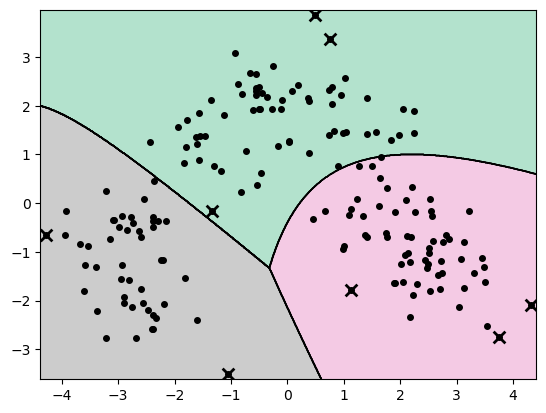

In [80]:
plot_decision_boundaries(gm, X, anomalies)

# AgglomerativeClustering

In [81]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3)
ac.fit(X)

AgglomerativeClustering(n_clusters=3)

In [82]:
ac.n_clusters_

3

Text(0.5, 1.0, 'Aglomerative')

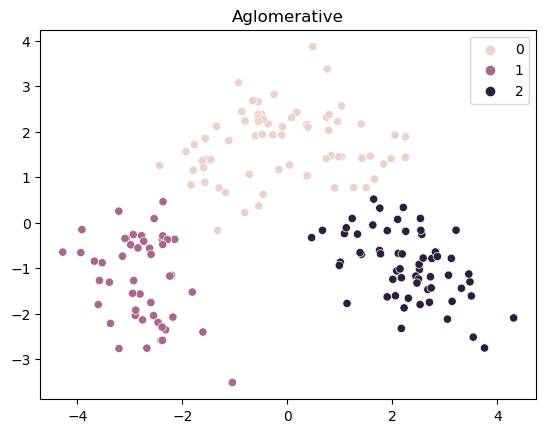

In [84]:
import seaborn as sns
sns.scatterplot(x=X[:,0], y=X[:,1], hue=ac.labels_).set_title('Aglomerative')

In [157]:
ac.fit_predict(X)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

# Con los clústeres finales analizar como se distribuye cada variable en ellos

In [87]:
# 3 clusters
wine_org["cluster"] = kmeans.labels_
wine_org.groupby('cluster').agg(["mean","std"])

Alcohol           Malic_Acid                 Ash            \
              mean       std       mean       std      mean       std   
cluster                                                                 
0        13.659219  0.574446   1.975781  0.677457  2.463750  0.247113   
1        13.151633  0.524898   3.344490  1.079136  2.434694  0.183520   
2        12.238308  0.499836   1.931385  1.025503  2.219385  0.296284   

        Ash_Alcanity             Magnesium             ... Proanthocyanins  \
                mean       std        mean        std  ...            mean   
cluster                                                ...                   
0          17.596875  3.391959  107.312500  13.456426  ...        1.921719   
1          21.438776  2.239868   99.020408  10.968686  ...        1.163061   
2          19.898462  3.015765   92.830769  13.764276  ...        1.587692   

                  Color_Intensity                 Hue               OD280  \
              std            mean       std      mean       std      mean   
cluster                                                                     
0        0.431544        5.406250  1.304676  1.069688  0.123507  3.157188   
1        0.410006        7.343265  2.316626  0.685918  0.115451  1.690204   
2        0.589074        2.992615  0.843142  1.051631  0.203526  2.769231   

                       Proline              
              std         mean         std  
cluster                                     
0        0.361314  1082.562500  250.522240  
1        0.273271   627.551020  115.068469  
2        0.486522   506.353846  142.144560  

[3 rows x 26 columns]

In [92]:
# 5 clusters
X = wine_pca[:,:2]
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit_predict(X)
kmeans.labels_
wine_org["cluster"] = kmeans.labels_
wine_org.groupby('cluster').agg(["mean","std"])

c:\Users\nicolas.portossaaved\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Alcohol           Malic_Acid                 Ash            \
              mean       std       mean       std      mean       std   
cluster                                                                 
0        13.174130  0.531131   3.422391  1.021392  2.443696  0.185740   
1        12.182895  0.474871   1.793421  0.825929  2.166053  0.276215   
2        12.962121  0.693572   1.863333  0.819122  2.388485  0.368901   
3        12.433636  0.531275   2.369545  1.270364  2.359091  0.239024   
4        13.945128  0.383467   1.965897  0.631088  2.456410  0.181984   

        Ash_Alcanity             Magnesium             ... Proanthocyanins  \
                mean       std        mean        std  ...            mean   
cluster                                                ...                   
0          21.576087  2.167865   99.130435  10.385051  ...        1.156087   
1          19.834211  2.845601   89.131579   7.562965  ...        1.566842   
2          18.796970  3.805464  105.454545  18.690056  ...        1.909394   
3          20.613636  3.252588   94.863636  14.759325  ...        1.284545   
4          16.669231  2.399249  108.717949  10.694191  ...        2.030513   

                  Color_Intensity                 Hue               OD280  \
              std            mean       std      mean       std      mean   
cluster                                                                     
0        0.416352        7.510217  2.288865  0.679565  0.115911  1.695870   
1        0.486033        2.781579  0.768996  1.093947  0.223939  2.926316   
2        0.527494        4.092121  0.800140  1.074545  0.135510  3.094545   
3        0.445568        3.355000  0.955579  0.934818  0.144842  2.303636   
4        0.419956        6.162051  1.004202  1.065897  0.123175  3.150513   

                       Proline              
              std         mean         std  
cluster                                     
0        0.270313   629.456522  117.587926  
1        0.421307   465.578947  119.566476  
2        0.417418   858.727273  235.181615  
3        0.541247   537.272727  137.577400  
4        0.332162  1183.128205  217.106108  

[5 rows x 26 columns]

En base a los resultados proporcionados anteriormente, es mejor dividirlo en 3 clusters